In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
gpu = tf.config.experimental.list_physical_devices('GPU')[0]
tf.config.experimental.set_memory_growth(gpu, True)
from utils import Predictor, Smoother, get_volumes, on_balance_volume

In [2]:
model = Predictor('tdnn', 32)
data_path = 'dataset/MMM-18.csv'

In [3]:
x, y = model.load_transform(data_path)

In [4]:
print(x.shape, y.shape)

(92, 1, 7, 1) (92, 7)


In [5]:
pred = model.predict(x)
print(pred.shape)

(92, 7)


In [6]:
from sklearn.metrics import explained_variance_score
score = explained_variance_score(y, pred) # 1.0 is best
score

0.9856101593231131

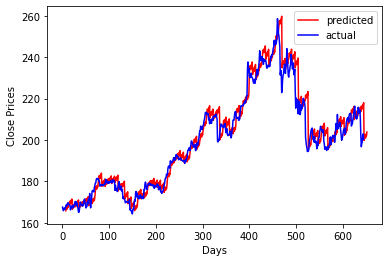

In [7]:
days = np.arange(1, len(y.reshape(1,-1)[0])+1)
plt.plot(days+7, pred.reshape(1,-1)[0], 'r', label='predicted')
plt.plot(days, y.reshape(1,-1)[0], 'b', label='actual')
plt.xlabel('Days')
plt.ylabel('Close Prices')
plt.legend()
plt.show()

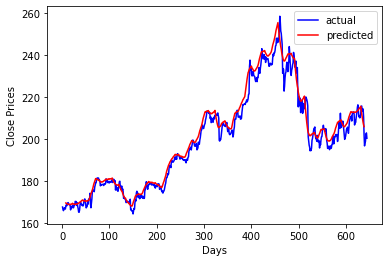

In [8]:
smoother = Smoother(pred.reshape(-1, 1)[:, 0], 14)
transform_pred = smoother.transform('hamming')
days = np.arange(1, len(y.reshape(1,-1)[0])+1)
plt.plot(days, y.reshape(1,-1)[0], 'b', label='actual')
days = np.arange(1, len(transform_pred)+1)
plt.plot(days+7, transform_pred, 'r', label='predicted')
plt.xlabel('Days')
plt.ylabel('Close Prices')
plt.legend()
plt.show()

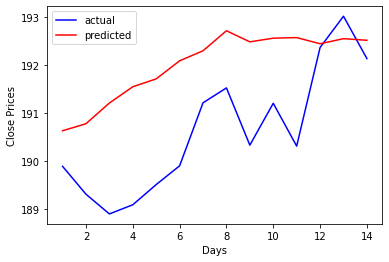

In [9]:
days = np.arange(1, len(y[33:35].reshape(1,-1)[0])+1)
plt.plot(days, y[33:35].reshape(1,-1)[0], 'b', label='actual')
days = np.arange(1, len(transform_pred[32:34])*7+1)
plt.plot(days, transform_pred[32*7:34*7], 'r', label='predicted')
plt.xlabel('Days')
plt.ylabel('Close Prices')
plt.legend()
plt.show()

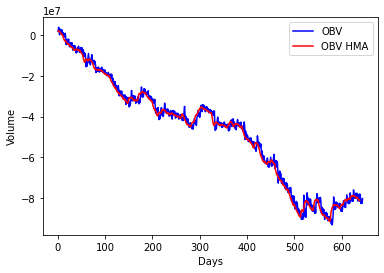

In [14]:
# Pred data without smooth
volumes = get_volumes(data_path)
obv = on_balance_volume(volumes, pred.reshape(1, -1)[0])
days = np.arange(1, len(obv)+1)
smoother = Smoother(obv, 7)
obv_hma = smoother.transform('hamming')
plt.plot(days, obv, 'b', label='OBV')
days = np.arange(1, len(obv_hma)+1)
plt.plot(days, obv_hma, 'r', label='OBV HMA')
plt.xlabel('Days')
plt.ylabel('Volume')
plt.legend()
plt.show()

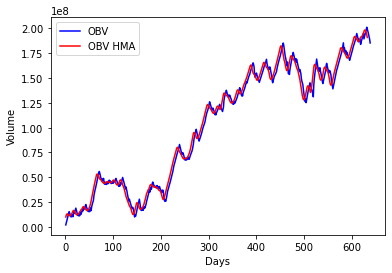

In [33]:
# Pred data with smooth
smoother = Smoother(pred.reshape(-1, 1)[:, 0], 7)
transform_pred = smoother.transform('hamming')
volumes = get_volumes(data_path)
obv = on_balance_volume(volumes, transform_pred)
days = np.arange(1, len(obv)+1)
smoother = Smoother(obv, 7)
obv_hma = smoother.transform('hamming')
plt.plot(days, obv, 'b', label='OBV')
days = np.arange(1, len(obv_hma)+1)
plt.plot(days, obv_hma, 'r', label='OBV HMA')
plt.xlabel('Days')
plt.ylabel('Volume')
plt.legend()
plt.show()

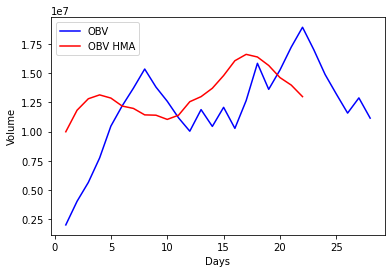

In [32]:
# Pred data with smooth Zoomed
smoother = Smoother(pred.reshape(-1, 1)[:, 0], 7)
transform_pred = smoother.transform('hamming')
volumes = get_volumes(data_path)
obv = on_balance_volume(volumes[:28], transform_pred[:28])
days = np.arange(1, len(obv)+1)
smoother = Smoother(obv, 7)
obv_hma = smoother.transform('hamming')
plt.plot(days, obv, 'b', label='OBV')
days = np.arange(1, len(obv_hma)+1)
plt.plot(days, obv_hma, 'r', label='OBV HMA')
plt.xlabel('Days')
plt.ylabel('Volume')
plt.legend()
plt.show()

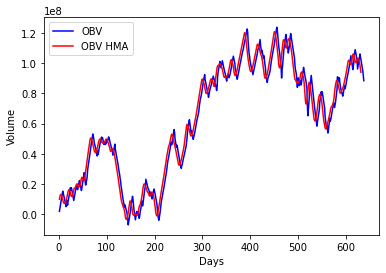

In [35]:
# Real data
smoother = Smoother(y.reshape(-1, 1)[:, 0], 7)
y_smooth = smoother.transform('hamming')
volumes = get_volumes(data_path)
obv = on_balance_volume(volumes, y_smooth)
days = np.arange(1, len(obv)+1)
smoother = Smoother(obv, 7)
obv_hma = smoother.transform('hamming')
plt.plot(days, obv, 'b', label='OBV')
days = np.arange(1, len(obv_hma)+1)
plt.plot(days, obv_hma, 'r', label='OBV HMA')
plt.xlabel('Days')
plt.ylabel('Volume')
plt.legend()
plt.show()

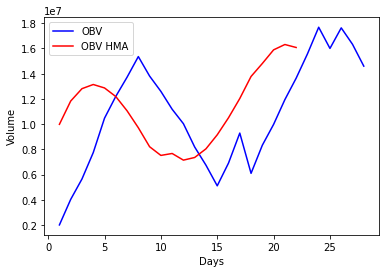

In [36]:
# Real data Zoom
smoother = Smoother(y.reshape(-1, 1)[:, 0], 7)
y_smooth = smoother.transform('hamming')
volumes = get_volumes(data_path)
obv = on_balance_volume(volumes[:28], y_smooth[:28])
days = np.arange(1, len(obv)+1)
smoother = Smoother(obv, 7)
obv_hma = smoother.transform('hamming')
plt.plot(days, obv, 'b', label='OBV')
days = np.arange(1, len(obv_hma)+1)
plt.plot(days, obv_hma, 'r', label='OBV HMA')
plt.xlabel('Days')
plt.ylabel('Volume')
plt.legend()
plt.show()